# An exploration of hate crimes across America in 2013


 ### Introduction 

 The dataset that originally holds the data used for this analytic report comes from the statistical efforts   FBI's UCR program, an effort responsible for tracking reports of hate violence across the US. In this report, I use an abridged version with fewer columns accessible from Github  This data is highly important as it helps map crimes that go against one of the greatest values of the United States: Diversity. 
    
The dataset contains data points for a number of crimes: Racial, Religious, Sexual Orientation, Ethnicity, Gender, and Disability. Additionally, it contains columns regarding place and time including: State, Agency Type, Name of the Jurisdiction, and the yearly Quarter in which the incident was reported. In total, the dataset has 1828 rows and 15 columns. I choose to examine racial, religious, and sexual orientation related hate crimes specifically.

    
Upon seeing my dataset, I raised three questions:
                                         
  > Is there a significant relation between crimes being comitted at the first and last quarters, and second and     third quarters of the year?
               
   > Which was the most common hate crime?
   
   >  Are hate crimes more prevalent in cities, counties, non metropolitan counties, or higher-ed campuses? 
     
  And seek to answer all three using staticical analysis and visualization. 
    



 ## Analytic Questions 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
hatecrimes = pd.read_csv('hatecrime.csv')
hatecrimes.describe()

,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender Identity,1st quarter,2nd quarter,3rd quarter,4th quarter
count,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1824.000000,1797.000000,1790.000000,1798.000000,1782.000000
mean,1.572837,0.565170,0.677437,0.358708,0.045455,0.016996,0.703951,0.924581,0.932147,0.749719
std,4.081956,4.022999,3.195289,1.379308,0.365069,0.307587,2.250526,3.206061,3.262212,2.988503
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,88.000000,152.000000,99.000000,36.000000,12.000000,12.000000,56.000000,84.000000,81.000000,93.000000


### 1) Is there a significant relation between crimes being comitted at the first and last quarters, and second and third quarters of the year?

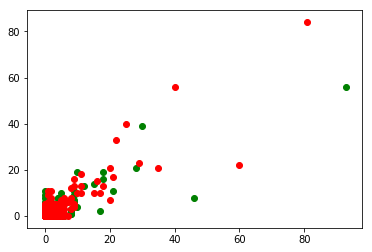

In [3]:
#scatter plot and histogram plot 

#Is there a relation between crimes being comitted at the first and last quarters, and second and third quarters? 
quarter1 = hatecrimes.loc[:, '1st quarter']
quarter2 = hatecrimes.loc[:, '2nd quarter']
quarter3 = hatecrimes.loc[:, '3rd quarter']
quarter4 = hatecrimes.loc[:, '4th quarter']



plt.scatter(x=quarter4, y=quarter1, color = 'green')
plt.scatter(x=quarter3, y=quarter2, color = 'red')

# Show means and variance between the two groups

This scatterplot examines whether there is correlation between the middle quarters of the year and incidient reports as well as correlation between the first and last quarters of the year for reporting. The fanning of the datapoints suggest that no correlation exist among both sets of variables. 

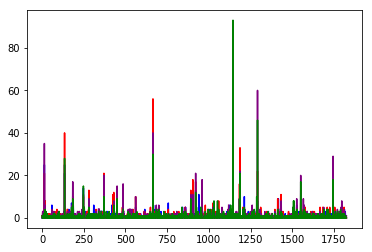

In [4]:
plt.plot(quarter1, color = 'blue')
plt.plot(quarter2, color = 'red')
plt.plot(quarter3,  color = 'purple')
plt.plot(quarter4, color = 'green')

This linechart further examines the rate of occurance for each quarter and also show a lack of linearity for each of  the different quarters. It also conveys that zero incidents were reported for places. 

### 2) What is the most common hate crime committed? 

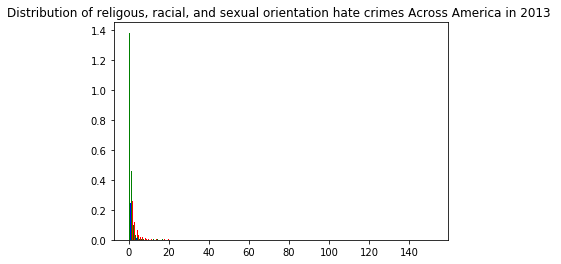

In [5]:
# Create a bar graph and histogram 

religion = hatecrimes.loc[:, 'Religion']
so = hatecrimes.loc[:, 'Sexual orientation']
race = hatecrimes.loc[:,'Race']

plt.hist(religion, density=True, bins= 200, color='blue')
plt.hist(race, density=True, bins=200, color = 'red')
plt.hist(so, density=True, bins=200, color = 'green')

plt.title('Distribution of religous, racial, and sexual orientation hate crimes Across America in 2013 ')
plt.show()

The data is heavily rightskewed, however the emergence of red demonstrates suggest a slightly higher rate of racial incidences. Further statistical analysis of the mean and variance for each kind of crime confirms this. 

In [12]:
print(hatecrimes['Race'].var()) 
print(hatecrimes['Religion'].var())
print(hatecrimes['Sexual orientation'].var())



16.66236312622845
16.18451769718975
10.209868715209529


In [7]:
print(np.mean(hatecrimes['Race']))
print(np.mean(hatecrimes['Religion']))
print(np.mean(hatecrimes['Sexual orientation']))


1.5728368017524643
0.5651697699890471
0.6774370208105148


Text(0.5, 1.0, 'Distribution of religous, racial, and sexual orientation hate crimes Across America in 2013 ')

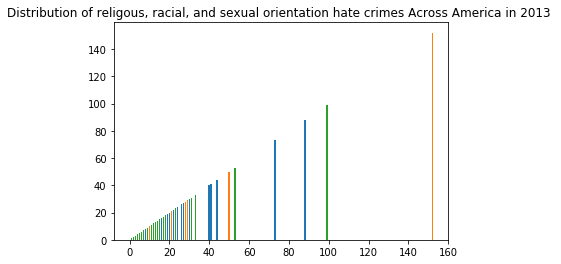

In [8]:
plt.bar(hatecrimes['Race'],hatecrimes['Race'])#blue 
plt.bar(hatecrimes['Religion'],hatecrimes['Religion'])#orange
plt.bar(hatecrimes['Sexual orientation'],hatecrimes['Sexual orientation'])#green
plt.title('Rate of religous, racial, and sexual orientation hate crimes Across America in 2013 ')


While there is a simliar amount of variance between religious hate crimes and racial hate crimes, the mean is significantlly higher for racial hate crimes further suggusting a higher rate of occurance. The bar graph reveals a large outlier in religious hate crimes which may explain a similar amount of variance as the rate of racial hate crimes but a lower mean. Sexual orientation hate crimes have fewer places with significant incidence rates, but deomstrates a visual similar to the other hate crimes, explanning its low variance but similar mean. 



### 3) Which jurisdcition type had the greatest occurance of hate crimes? 

In [9]:
hatecrimes.groupby('Agency type').sum()


,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender Identity,1st quarter,2nd quarter,3rd quarter,4th quarter
Agency type,,,,,,,,,,
Cities,2280,783,1022,501,65,28.0,1006.0,1330.0,1329.0,1031.0
Metropolitan Counties,363,158,122,118,10,2.0,151.0,218.0,221.0,183.0
Nonmetropolitan Counties,83,16,18,14,7,0.0,23.0,33.0,46.0,36.0
Other Agencies,23,20,6,3,0,0.0,12.0,13.0,17.0,10.0
State Police Agencies,30,17,16,8,0,0.0,21.0,21.0,19.0,11.0
Universities and Colleges,93,38,53,11,1,1.0,52.0,40.0,44.0,65.0


Text(0.5, 1.0, 'Distribution of hate crimes by location type Across America in 2013 ')

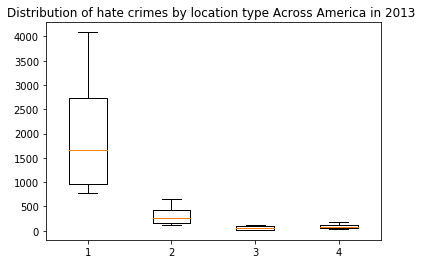

In [10]:
place_data = pd.DataFrame()

place_data['racial crimes'] = [2280, 363, 83, 93]
place_data['religious crimes'] = [783, 158, 16, 38]
place_data['sexual orientation'] = [1022, 122,18,53]
place_data['total incidents'] = place_data['racial crimes'] + place_data['religious crimes'] + place_data['sexual orientation'] 
plt.boxplot(place_data)
plt.title('Distribution of hate crimes by location type Across America in 2013 ')



These boxplots are visualizations of the distribution of total crimes split by location type. The first represents cities, the second metro counties, the third nonmetro counties, and the last higher ed spaces. While further conveying the abundance of city incidents, this  box plot also conveys the amount of variance in city incidents being the greatest. 

Text(0.5, 1.0, 'Amount of crimes by location type')

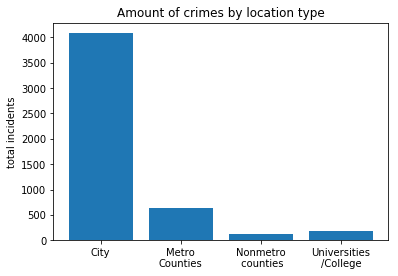

In [11]:
place_data['names'] = ['City', 'Metro\nCounties', 'Nonmetro\n counties', 'Universities\n/College']
place_data.index = place_data['names']

plt.bar(place_data['names'],place_data['total incidents'])
plt.ylabel('total incidents')
plt.title('Amount of crimes by location type')


Over the types of jurisdictions or location types I examined, cities were overwhelming represented in the data. Incidents that occur in cities are more common than each of the other location types combnied. This finding, however, makes sense as cities tend to be more diverse than the other location types, and more populous in general.

## Further Quetions and Next Steps 



In conclusion, there seems to be no correlation among which quarters of the year crimes are comitted. Racial hate crimes were the most common type of crime, and these crimes were overwhelmingly perpetrated in cities. However, there are more questions to be raised. 



   Upon grouping the data by jurisdiction type, the data demonstrates that incidences overwhelmingly occur in cities. Is this a matter of cities or are cities overly represented due to higher population numbers? Further investigation into population numbers may reveal that relationship. 
    
-  Population numbers are included in the dataset but as a string. In order to answer this question, I would convert population numbers to integers, and compute a ratio of total incidents to the total population. Then I would plot the findings and conduct a statistical test to find a correlation.

<br>
  Additionally, what revelations would be revealed by grouping states regionally?
    
-  To accomplish this task, I would categorize each state into one of five regions according to their geographic position on the continent: the Northeast, Southwest, West, Southeast, and Midwest. I would conduct a similar analysis to see how the difference in jurisdictions and kind of crimes committed differ by region. 


  In 2017, the [dramtic increase](https://www.theguardian.com/us-news/2018/nov/13/fbi-data-hate-crimes-rise-us-reportin) in hate crimes made a number of national headlines.  Are these increases an anomaly or on par with prior data? Can the dramatic increase in hate crimes in 2017 be predicted from trends in prior hate crime data? Would this model capture predict the rise in hate crimes in 2017? 
-  To accomplish this task, I would train a predictive model on the prior hate crime data collected by the same organization. I would evaluate where the model had ample predictions and where the model's predictions were further off from what was reported for 2017. 



